In [144]:
import pandas as pd


In [145]:
train_df = pd.read_csv('../data/raw/captors.csv')
train_df.head()

,timestamp,température,pression,humidité,salle,capacité,jour_semaine,type_jour,occupation_%,température_ext,événement_spécial
0,2025-06-02T08:00:00,18.54,1009.9,37.4,Amphitheatre,200,Monday,semaine,0.0,19.45,1
1,2025-06-02T08:00:00,19.89,1007.9,37.0,C013,35,Monday,semaine,0.0,19.66,0
2,2025-06-02T08:00:00,20.53,1013.2,39.6,A006,70,Monday,semaine,0.0,19.95,0
3,2025-06-02T09:00:00,30.78,1014.5,37.5,Amphitheatre,200,Monday,semaine,91.5,21.90,0
4,2025-06-02T09:00:00,24.86,1009.0,44.8,C013,35,Monday,semaine,65.5,23.36,0


In [146]:
train_df.describe()

,température,pression,humidité,capacité,occupation_%,température_ext,événement_spécial
count,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000
mean,24.561394,1011.923333,39.687879,101.666667,57.330303,21.686455,0.275758
std,4.765012,2.075395,4.976416,71.092930,32.089582,3.194593,0.447574
min,11.690000,1006.300000,23.600000,35.000000,0.000000,11.730000,0.000000
25%,21.447500,1010.500000,36.400000,35.000000,34.625000,19.652500,0.000000
50%,24.965000,1012.100000,39.600000,70.000000,67.400000,22.450000,0.000000
75%,27.647500,1013.300000,42.775000,200.000000,81.950000,24.085000,1.000000
max,35.510000,1017.500000,52.500000,200.000000,100.000000,27.230000,1.000000


In [147]:
train_df.isnull().sum()

timestamp            0
température          0
pression             0
humidité             0
salle                0
capacité             0
jour_semaine         0
type_jour            0
occupation_%         0
température_ext      0
événement_spécial    0
dtype: int64

In [148]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          330 non-null    object 
 1   température        330 non-null    float64
 2   pression           330 non-null    float64
 3   humidité           330 non-null    float64
 4   salle              330 non-null    object 
 5   capacité           330 non-null    int64  
 6   jour_semaine       330 non-null    object 
 7   type_jour          330 non-null    object 
 8   occupation_%       330 non-null    float64
 9   température_ext    330 non-null    float64
 10  événement_spécial  330 non-null    int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 28.5+ KB


In [149]:
import matplotlib.pyplot as plt
import seaborn as sns

## Temperature

In [150]:
train_df["timestamp"] = pd.to_datetime(train_df["timestamp"])
train_df["heure"] = train_df["timestamp"].dt.hour
train_df["jour"] = train_df["timestamp"].dt.day_name()

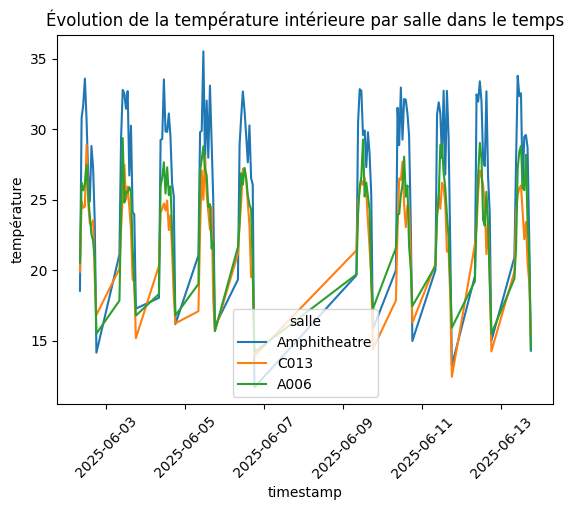

In [151]:
sns.lineplot(data=train_df, x="timestamp", y="température", hue="salle")
plt.title("Évolution de la température intérieure par salle dans le temps")
plt.xticks(rotation=45)
plt.show()


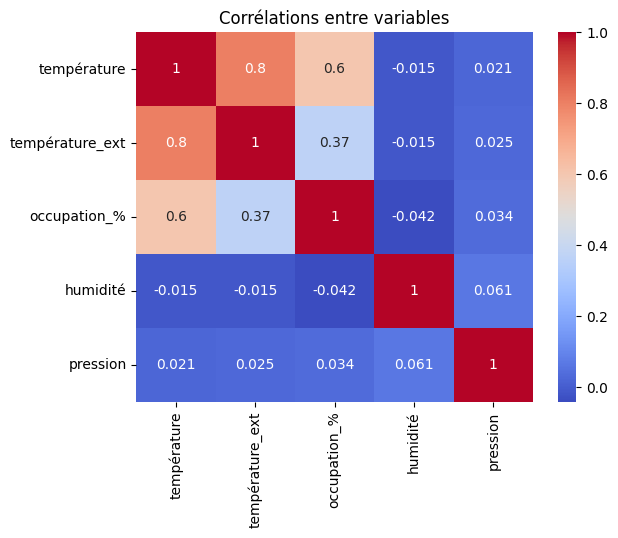

In [152]:
sns.heatmap(
    train_df[
        ["température", "température_ext", "occupation_%", "humidité", "pression"]
    ].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Corrélations entre variables")
plt.show()


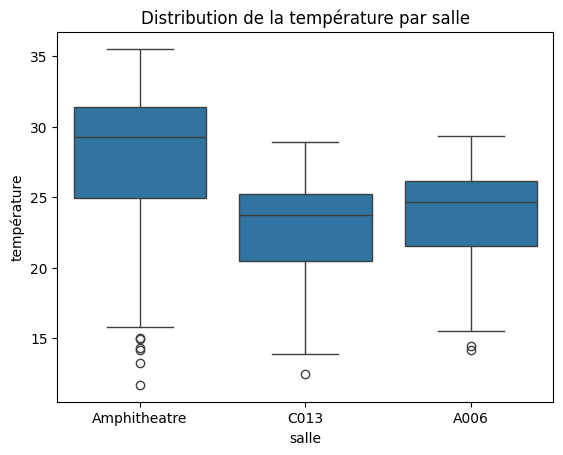

In [153]:
sns.boxplot(data=train_df, x="salle", y="température")
plt.title("Distribution de la température par salle")
plt.show()


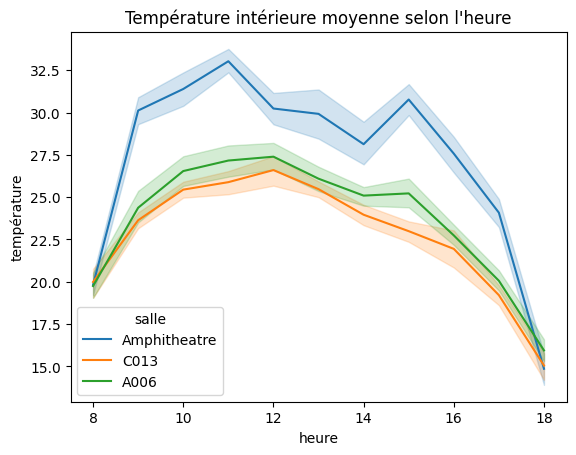

In [154]:
sns.lineplot(data=train_df, x="heure", y="température", hue="salle")
plt.title("Température intérieure moyenne selon l'heure")
plt.show()


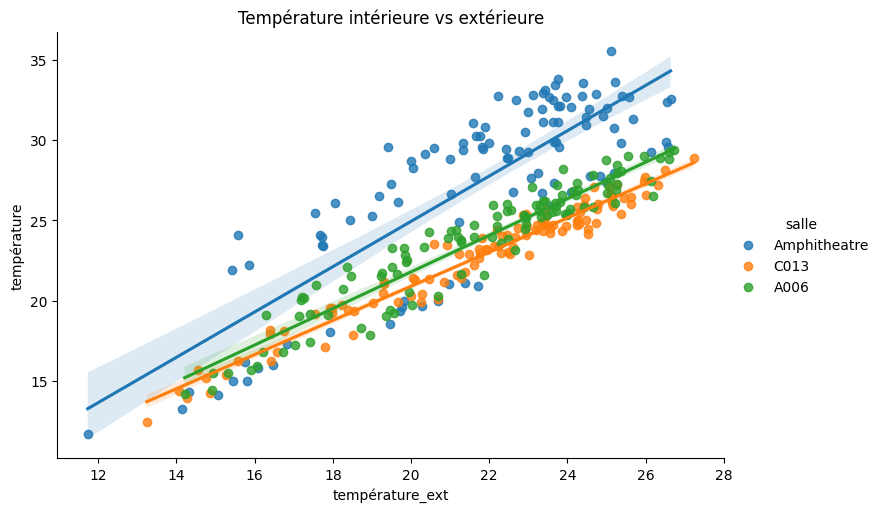

In [155]:
sns.lmplot(data=train_df, x="température_ext", y="température", hue="salle", aspect=1.5)
plt.title("Température intérieure vs extérieure")
plt.show()


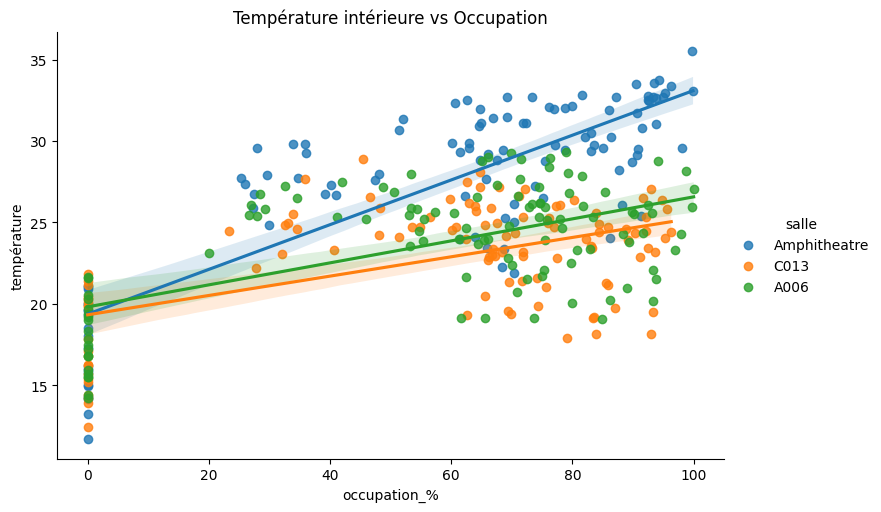

In [156]:
sns.lmplot(data=train_df, x="occupation_%", y="température", hue="salle", aspect=1.5)
plt.title("Température intérieure vs Occupation")
plt.show()


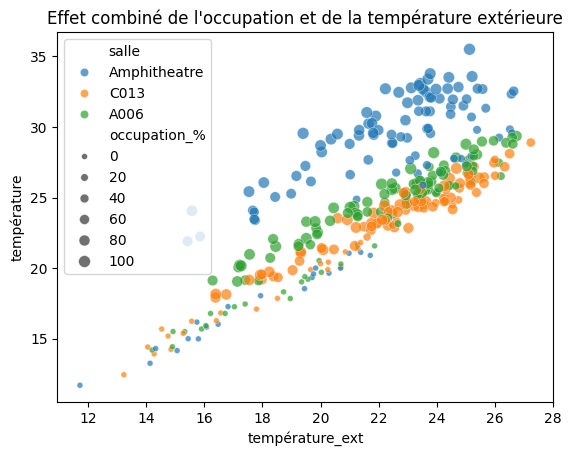

In [157]:
sns.scatterplot(
    data=train_df,
    x="température_ext",
    y="température",
    size="occupation_%",
    hue="salle",
    alpha=0.7,
)
plt.title("Effet combiné de l'occupation et de la température extérieure")
plt.show()


## Humidite

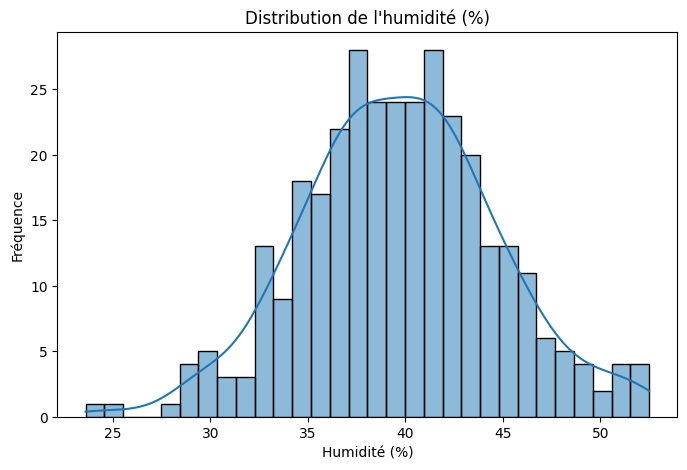

In [158]:
plt.figure(figsize=(8, 5))
sns.histplot(train_df["humidité"], bins=30, kde=True)
plt.title("Distribution de l'humidité (%)")
plt.xlabel("Humidité (%)")
plt.ylabel("Fréquence")
plt.show()


In [159]:
out_of_range = train_df[(train_df["humidité"] < 0) | (train_df["humidité"] > 100)]
print(f"Nombre de valeurs hors plage : {len(out_of_range)}")

Nombre de valeurs hors plage : 0


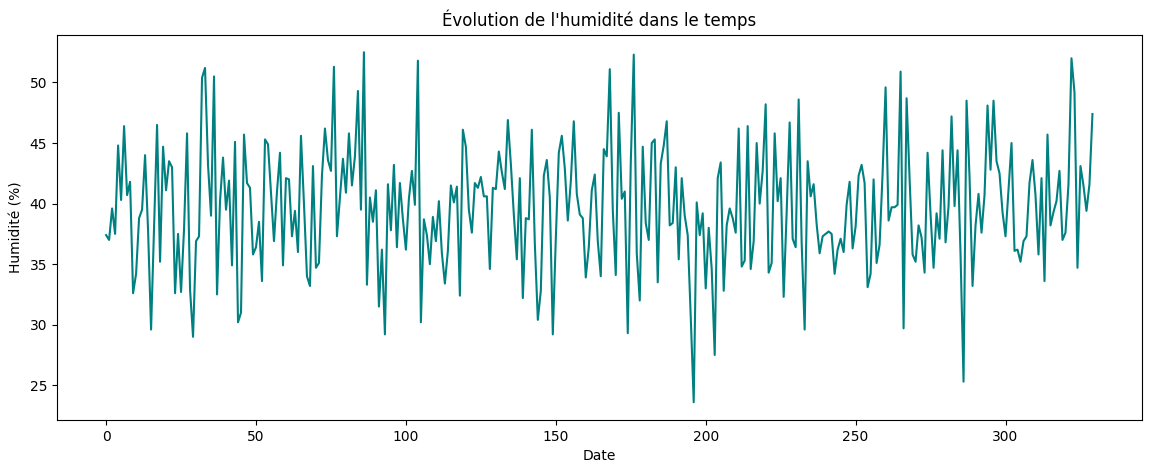

In [160]:
plt.figure(figsize=(14, 5))
train_df["humidité"].plot(color="teal")
plt.title("Évolution de l'humidité dans le temps")
plt.xlabel("Date")
plt.ylabel("Humidité (%)")
plt.show()


In [161]:
train_df["hour"] = train_df["timestamp"].dt.hour
train_df = train_df.drop(columns=["timestamp"])


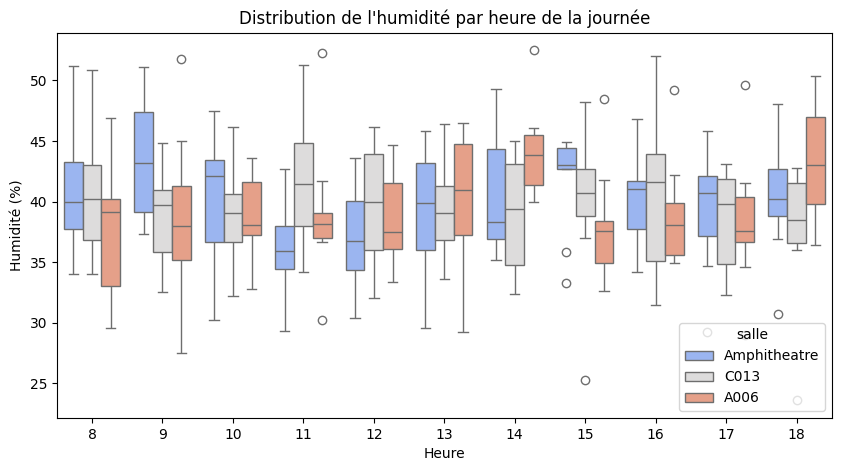

In [162]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="hour", y="humidité", data=train_df, palette="coolwarm", hue="salle")
plt.title("Distribution de l'humidité par heure de la journée")
plt.xlabel("Heure")
plt.ylabel("Humidité (%)")
plt.show()


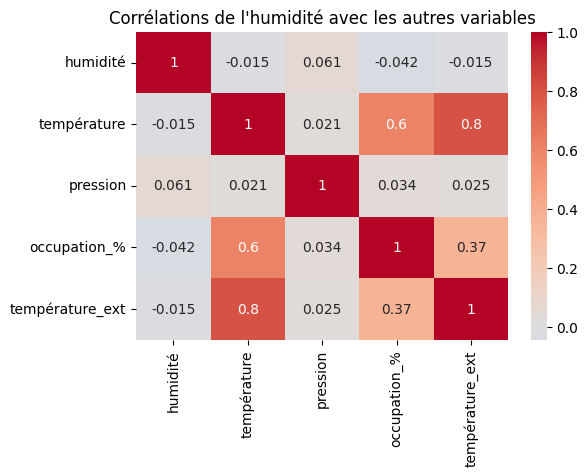

In [163]:
numeric_cols = [
    "humidité",
    "température",
    "pression",
    "occupation_%",
    "température_ext",
]
plt.figure(figsize=(6, 4))
corr_matrix = train_df[numeric_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    center=0,
    cmap="coolwarm",
)
plt.title("Corrélations de l'humidité avec les autres variables")
plt.show()


In [164]:
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer

X = train_df.drop(columns=["humidité"])
y = train_df["humidité"]

categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
numeric_cols = X.select_dtypes(include=["number"]).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)],
    remainder="passthrough",
)

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

model = HistGradientBoostingRegressor(
    max_iter=500, max_depth=5, learning_rate=0.1, random_state=42
)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE sur le train: {rmse_train:.3f}")
print(f"RMSE sur le test: {rmse_test:.3f}")


RMSE sur le train: 1.239
RMSE sur le test: 5.944


In [165]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

model = HistGradientBoostingRegressor(random_state=42)

param_grid = {
    "max_iter": [300, 400, 500],
    "max_depth": [4, 5, 6], 
    "min_samples_leaf": [15, 20, 25],
    "learning_rate": [0.025, 0.03, 0.04],
    "max_bins": [255],
    "l2_regularization": [0.05, 0.1, 0.5],
}

search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=15, 
    cv=5,
    scoring="neg_root_mean_squared_error",
    verbose=2,
    random_state=42,
    n_jobs=-1,
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
print("Meilleurs paramètres :", search.best_params_)

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"RMSE sur le train: {rmse_train:.3f}")
print(f"RMSE sur le test: {rmse_test:.3f}")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=4, max_iter=500, min_samples_leaf=15; total time=   0.2s
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=4, max_iter=500, min_samples_leaf=15; total time=   0.2s
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=4, max_iter=500, min_samples_leaf=15; total time=   0.2s
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=6, max_iter=500, min_samples_leaf=15; total time=   0.2s
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=6, max_iter=500, min_samples_leaf=15; total time=   0.2s
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=6, max_iter=500, min_samples_leaf=15; total time=   0.2s
[CV] END l2_regularization=0.05, learning_rate=0.025, max_bins=255, max_depth=6, max_iter=500, min_samples_leaf=15; total time=  

In [166]:
import os
import joblib

model = HistGradientBoostingRegressor(
    min_samples_leaf=15,
    max_iter=500,
    max_depth=4,
    max_bins=255,
    learning_rate=0.025,
    l2_regularization=0.05,
    random_state=42,
)

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

os.makedirs("../model", exist_ok=True)
joblib.dump(model, "../model/hist_gradient_boosting.pkl")
print("Modèle sauvegardé")


Modèle sauvegardé
